<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up-the-Environment-and-Upload-data" data-toc-modified-id="Set-up-the-Environment-and-Upload-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set up the Environment and Upload data</a></span></li><li><span><a href="#Initial-Exploration-and-Pre-processing" data-toc-modified-id="Initial-Exploration-and-Pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Exploration and Pre-processing</a></span><ul class="toc-item"><li><span><a href="#DisGeNET-:-Gene-Disease-Association-(GDA)" data-toc-modified-id="DisGeNET-:-Gene-Disease-Association-(GDA)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DisGeNET : Gene Disease Association (GDA)</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Bibliografia" data-toc-modified-id="Bibliografia-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bibliografia</a></span></li></ul></div>

In [48]:
#packages
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tdc.multi_pred import GDA
from IPython.display import HTML
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Set up the Environment and Upload data

<div style="text-align: justify;">
To ensure that all the project's dependencies are installed correctly, we recommend using a Conda environment. You can easily create the environment with the project's dependencies from the env.yml file included in this repository.

In [49]:
# To use the DisGeNET dataset with TDC platform, we use the following code:
data = GDA(name='DisGeNET')

print("Data uploading completed :)")

Found local copy...
Loading...
Done!


Data uploading completed :)


## Initial Exploration and Pre-processing

<div style="text-align: justify;">
This section contains a comprehensive overview of the assigned data, starting with a detailed description and characterization based on existing documentation and literature. It includes a concise summary of the data's characteristics derived from an initial exploratory analysis, highlighting key statistics and observations. The section also describes the steps taken for data preparation and pre-processing, providing justification for each choice to ensure the data is clean, transformed, and organized for further analysis. Additionally, initial exploratory graphs are presented to visually illustrate the main characteristics of the data, helping to understand patterns, trends, and potential issues within the dataset.
 </div>

### DisGeNET : Gene Disease Association (GDA) 

In [50]:
HTML('<div style="display: flex; justify-content: center;"><img src="https://www.ensembl.info/wp-content/uploads/2021/04/disgenet-logo-horizontal.png" width="400"/></div>')

The study of **gene-disease associations is a crucial step in understanding the etiology of diseases**. Identifying the link between genes and diseases makes it possible to better understand the cause of the disease and therefore to develop strategies to combat it. This process is fundamental to the advancement of medicine and the development of new therapies. [1]

    

**Therapeutics Data Commons (TDC) is a database created to promote the discovery of therapies for diseases**, especially those that are difficult to treat. It was developed by the National Institutes of Health with the aim of gathering genomic and clinical data from various sources to support biomedical research and the development of new treatments. [2]


**GDA quantify the relation among a pair of gene-disease** and is one of the core concepts of DisGeNet platform that are integrated on TDC. DisGeNET is a discovery platform containing one of the largest publicly available collections of genes and variants associated to human diseases. **DisGeNET integrates data from expert curated repositories, Genome-Wide Association Study catalogues, animal models and the scientific literature**. DisGeNET data are homogeneously annotated with controlled vocabularies and community-driven ontologies. TDC uses the curated subset from UNIPROT, CGI, ClinGen, Genomics England, CTD (human subset), PsyGeNET, and Orphanet. TDC maps disease ID to disease definition through MedGen and maps GeneID to uniprot amino acid sequence. [3]


This dataset contains **52,476 gene-disease pairs:** 7,399 genes and 7,095 diseases.                                   
As we can see by de code bellow we have an object with 52,476 rows and 5 columns: *'Gene_ID'*, *'Gene'*, *'Disease_ID'*, *'Disease'*, *'Y'*. 

- **Gene_ID** column contains all unique identifiers for genes.
- **Gene** column contains the sequences of amino acides corresponding to each gene_ID through Uniprot platform.
- **Disease_ID** column contains all unique identifiers for diseases.
- **Disease** column contains the disease definition corresponding to each disease_ID through MedGen-NCBI platform.
- **Y** column is the target feature and represents the probability of association for a pair gene-disease. This column have values between 0 and 1.

As our taregt feature is a numeric one, our work will be a regression problem when the main task is: *Given the disease description and the amino acid sequence of the gene, predict their association*.

In [51]:
#Inspecting DisGeNet dataset
full_data = data.get_data()
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52476 entries, 0 to 52475
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gene_ID     52476 non-null  int64  
 1   Gene        52476 non-null  object 
 2   Disease_ID  52476 non-null  object 
 3   Disease     52476 non-null  object 
 4   Y           52476 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ MB


,Gene_ID,Gene,Disease_ID,Disease,Y
0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,0.30
1,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0036341,Schizophrenia: Schizophrenia is highly heritab...,0.30
2,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0002395,Alzheimer's Disease: Alzheimer disease is the ...,0.50
3,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0007102,Malignant tumor of colon: A primary or metasta...,0.31
4,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0009375,Colonic Neoplasms: A benign or malignant neopl...,0.30


### Data Pre-Processing

Pre-processing is a crucial step to ensure the dataset is ready for analysis and modeling. In this section, we transform the raw DisGeNET data into a structured format, suitable for supervised learning tasks. Key steps include:  
- Disease text processing: Using TF-IDF to extract relevant features from disease descriptions.  
- Gene sequence encoding: Applying one-hot encoding for numerical representation of amino acid sequences.  
- Feature integration: Combining textual and genetic features into a unified dataset.  
- Data cleaning and normalization: Handling missing values and scaling numerical features.  
- Feature selection and dataset splitting: Filtering relevant columns and dividing the data into training, validation, and test sets.

#### Preprocessing Disease Descriptions  
To extract meaningful features from the disease descriptions, we use TF-IDF (Term Frequency-Inverse Document Frequency), a common text vectorization technique. This method transforms the textual descriptions into numerical features, capturing their relative importance in the dataset.

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Applying TF-IDF on the disease description column
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_disease = tfidf.fit_transform(full_data['Disease'])

#### Encoding Gene Amino Acid Sequences (One-Hot Encoding)  

Amino acid sequences of genes are transformed into numerical representations using a one-hot encoding approach. This ensures that sequence data is machine-readable, facilitating its integration with other features.

In [53]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# List of amino acids
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Mapping amino acids to indices
amino_acid_dict = {aa: idx for idx, aa in enumerate(amino_acids)}

def encode_sequence(sequence):
    # Encode each amino acid in the sequence as its corresponding index
    return [amino_acid_dict.get(aa, -1) for aa in sequence]

# Applying encoding to sequences
encoded_sequences = full_data['Gene'].apply(encode_sequence)

# Standardizing sequence length (maximum length of 100)
max_length = 100
padded_sequences = [
    seq[:max_length] + [0] * (max_length - len(seq)) if len(seq) < max_length else seq[:max_length]
    for seq in encoded_sequences
]

# Convert sequences to a NumPy array
X_gene = np.array(padded_sequences)


#### Feature Combination
To combine textual and sequence data into a single dataset, the numerical matrices generated from TF-IDF and one-hot encoding are concatenated.

In [54]:
# Combinação das features
from scipy.sparse import hstack

# Concatenar as duas matrizes
X = hstack([X_disease, X_gene])

#### Converting Data for Analysis
To facilitate analysis and model training, the feature matrices are converted into DataFrame formats and merged with the remaining dataset.

In [65]:
# Convert X_disease into a DataFrame
df_disease = pd.DataFrame(X_disease.toarray(), columns=tfidf.get_feature_names_out())

# Convert X_gene into a DataFrame
df_gene = pd.DataFrame(X_gene)

# Combine DataFrames with the rest of the dataset
full_data_processed = pd.concat([full_data.drop(columns=['Disease', 'Gene']), df_disease, df_gene], axis=1)

# Columns of the dataset after preprocessing
print(full_data_processed.columns.tolist())


['Gene_ID', 'Disease_ID', 'Y', '00', '000', '10', '108', '110', '12', '13', '14', '15', '16', '1999', '20', '2001', '2002', '2008', '2014', '2016', '22q11', '25', '30', '35', '40', '42', '44', '48', '50', '52', '56', '60', '61', '62', '65', '70', '80', '82', '83', '90', 'abdomen', 'abdominal', 'ability', 'able', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'absence', 'absent', 'abuse', 'accompanied', 'accounts', 'accumulation', 'acquired', 'active', 'activities', 'activity', 'acute', 'addiction', 'addition', 'additional', 'additionally', 'adenocarcinoma', 'adenocarcinomas', 'adenoid', 'adenoma', 'adenomas', 'adolescence', 'adoption', 'adrenal', 'adult', 'adulthood', 'adults', 'affect', 'affected', 'affecting', 'affective', 'affects', 'age', 'agents', 'aggressive', 'al', 'alcohol', 'alcoholic', 'alleles', 'als', 'aml', 'anaplastic', 'anatomic', 'anemia', 'anomalies', 'antipsychotic', 'anxiety', 'aorta', 'aortic', 'apoe', 'apparent', 'appear', 'appearance', 'appears', 'appet

#### Preview and Exploration of the Processed Dataset
To ensure the preprocessing steps were successful, we examine the first few rows, column names, data types, and basic statistics of the processed dataset.

In [56]:
# Verificar as primeiras linhas do dataset
print("Preview of the processed dataset:")
full_data_processed.head()

# Verificar colunas disponíveis
print("Columns available in the dataset:")
print(full_data_processed.columns.tolist())

# Verificar tipos de dados
print("Data types and non-null counts:")
print(full_data_processed.info())

# Estatísticas descritivas para features numéricas
print("Descriptive statistics for numerical features:")
print(full_data_processed.describe())

Preview of the processed dataset:
Columns available in the dataset:
['Gene_ID', 'Disease_ID', 'Y', '00', '000', '10', '108', '110', '12', '13', '14', '15', '16', '1999', '20', '2001', '2002', '2008', '2014', '2016', '22q11', '25', '30', '35', '40', '42', '44', '48', '50', '52', '56', '60', '61', '62', '65', '70', '80', '82', '83', '90', 'abdomen', 'abdominal', 'ability', 'able', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'absence', 'absent', 'abuse', 'accompanied', 'accounts', 'accumulation', 'acquired', 'active', 'activities', 'activity', 'acute', 'addiction', 'addition', 'additional', 'additionally', 'adenocarcinoma', 'adenocarcinomas', 'adenoid', 'adenoma', 'adenomas', 'adolescence', 'adoption', 'adrenal', 'adult', 'adulthood', 'adults', 'affect', 'affected', 'affecting', 'affective', 'affects', 'age', 'agents', 'aggressive', 'al', 'alcohol', 'alcoholic', 'alleles', 'als', 'aml', 'anaplastic', 'anatomic', 'anemia', 'anomalies', 'antipsychotic', 'anxiety', 'aorta', 'ao

#### Handling Missing Values
Despite the dataset being curated, it is crucial to explicitly check for any null values to ensure data integrity. Addressing missing data helps maintain the quality and reliability of downstream analyses.

In [57]:
# Checking for missing values
missing_values = full_data_processed.isnull().sum()
print("Missing values detected in the dataset:")
print(missing_values)

if missing_values.sum() == 0:
    print("No missing values found. The dataset is clean and ready for processing.")
else:
    full_data_processed.fillna(0, inplace=True)
    print("Missing values handled successfully by replacing them with 0.")


Checking for missing values in the dataset:
Gene_ID       0
Disease_ID    0
Y             0
00            0
000           0
             ..
95            0
96            0
97            0
98            0
99            0
Length: 1103, dtype: int64
No missing values found. The dataset is clean and ready for preprocessing :)


#### Verificação e Refinamento das Features
With over 1100 columns in the dataset, many are likely to be irrelevant or non-contributory for supervised analysis. In this step, we carefully analyze and identify the most relevant features, removing those that do not significantly contribute to the study's objectives. This process is essential to reduce model complexity, enhance performance, and ensure the results are both interpretable and focused on the most impactful variables.

In [58]:
# Verificar a relevância das features
print("Current number of columns:", len(full_data_processed.columns))

# Selecionar features para supervisão (exemplo: remover colunas irrelevantes)
columns_to_keep = ['Gene_ID', 'Disease_ID', 'Y']  # colunas relevantes aqui, temos de escolher e definir aqui o que vamos ver
columns_to_drop = [col for col in full_data_processed.columns if col not in columns_to_keep]

# Atualizar o DataFrame
filtered_data = full_data_processed.drop(columns=columns_to_drop, errors='ignore')

print("Columns retained for analysis:", filtered_data.columns.tolist())


Current number of columns: 1103
Columns retained for analysis: ['Gene_ID', 'Disease_ID', 'Y']


#### Normalizing Numerical Features
Normalizing numerical feature values ensures consistency by scaling them to a comparable range. This step is essential to enhance the performance of machine learning algorithms by preventing certain features from dominating due to differences in scale.

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar as features
scaler = MinMaxScaler()
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns
filtered_data[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])

print("Features normalized. Sample data:")
print(filtered_data.head())



Features normalized. Sample data:
        Gene_ID Disease_ID         Y
0  0.000000e+00   C0019209  0.000000
1  0.000000e+00   C0036341  0.000000
2  9.918585e-09   C0002395  0.285714
3  9.918585e-09   C0007102  0.014286
4  9.918585e-09   C0009375  0.000000


#### Splitting the Dataset into Train, Validation, and Test Sets
Splitting the dataset into training, validation, and test subsets ensures a robust evaluation of the model. This division allows for efficient training, fine-tuning, and unbiased testing to assess generalization performance.

In [60]:
from sklearn.model_selection import train_test_split

# Separar features e target
X = filtered_data.drop(columns=['Y'], errors='ignore')
y = filtered_data['Y']

# Divisão
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {X_train.shape}, Validation set: {X_valid.shape}, Test set: {X_test.shape}")



Train set: (36733, 2), Validation set: (7871, 2), Test set: (7872, 2)


### Exploratory Analysis

The exploratory data analysis will involve a comprehensive investigation of the dataset's characteristics. This will entail summarizing numerical and categorical data, analyzing the distribution of the target variable, and identifying patterns in gene-disease associations. Key tasks include examining the frequency distribution of genes and diseases, exploring the lengths of gene sequences, and assessing pairwise relationships between genes and diseases. Visualizations such as histograms, bar plots, and heatmaps will be utilized to uncover trends and potential anomalies. Furthermore, correlation analysis will be employed to understand dependencies between features, laying the groundwork for subsequent feature engineering and model development.

In [61]:
# Checking the distribution of categorical columns
print("\nUnique counts for categorical columns:")
for col in ['Gene_ID', 'Disease_ID']:
    print(f"{col}: {full_data[col].nunique()} unique values")


Unique counts for categorical columns:
Gene_ID: 7399 unique values
Disease_ID: 7095 unique values


In [62]:
# Number of unique genes
unique_genes = full_data['Gene_ID'].nunique()
print(f"Number of unique genes: {unique_genes}")

# Frequency of the 10 most common genes
gene_counts = full_data['Gene_ID'].value_counts().head(10)
print("\nFrequency of the 10 most common genes:")
print(gene_counts)

Number of unique genes: 7399

Frequency of the 10 most common genes:
7124    237
6648    200
7157    184
5743    183
3569    172
5728    157
5443    153
3553    142
4524    138
3845    138
Name: Gene_ID, dtype: int64


In [63]:
# Creating the reverse mapping for Disease_Label
full_data['Disease_Label'] = full_data['Disease_ID_encoded'].map(disease_reverse_mapping)

# Extract the part before the first colon
full_data['Disease_Label'] = full_data['Disease_Label'].str.split(':').str[0]

# Number of unique diseases
unique_diseases = full_data['Disease_Label'].nunique()
print(f"Number of unique diseases: {unique_diseases}")

# Frequency of the 10 most common diseases
disease_counts = full_data['Disease_Label'].value_counts().head(10)
print("\nFrequency of the 10 most common diseases:")
print(disease_counts)


KeyError: 'Disease_ID_encoded'

#### Sequence Length Analysis for Gene
Exploring the amino acid sequences of genes provides insights into their variability and patterns.

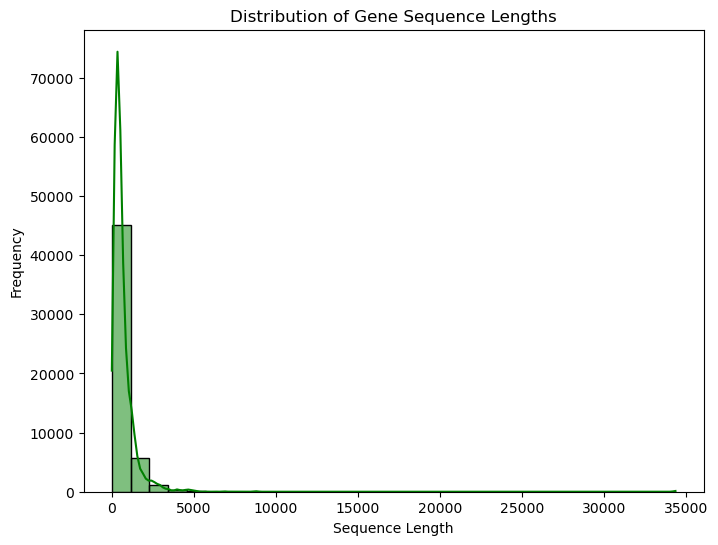

In [46]:
# Adding sequence length
full_data['Sequence_Length'] = full_data['Gene'].apply(len)

# Distribution of sequence lengths
plt.figure(figsize=(8, 6))
sns.histplot(full_data['Sequence_Length'], kde=True, bins=30, color='green')
plt.title("Distribution of Gene Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

Gene sequences vary widely in length, with most sequences concentrated in the 200-500 range.
This variation may affect the encoding process for machine learning.

#### Distribution of Target Variable (Y)
Understanding the distribution of the target variable is essential for model development, as skewed data may affect the learning process.

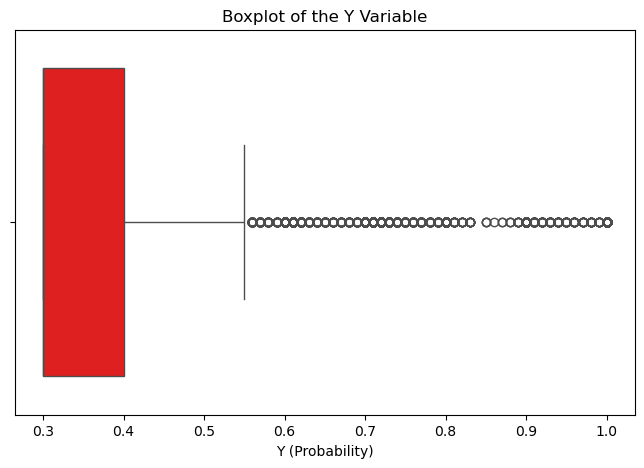

In [47]:
# Identification of outliers in the Y variable
# Plotting the boxplot of Y to visualize potential outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=full_data['Y'], color='red')
plt.title('Boxplot of the Y Variable')
plt.xlabel('Y (Probability)')
plt.show()

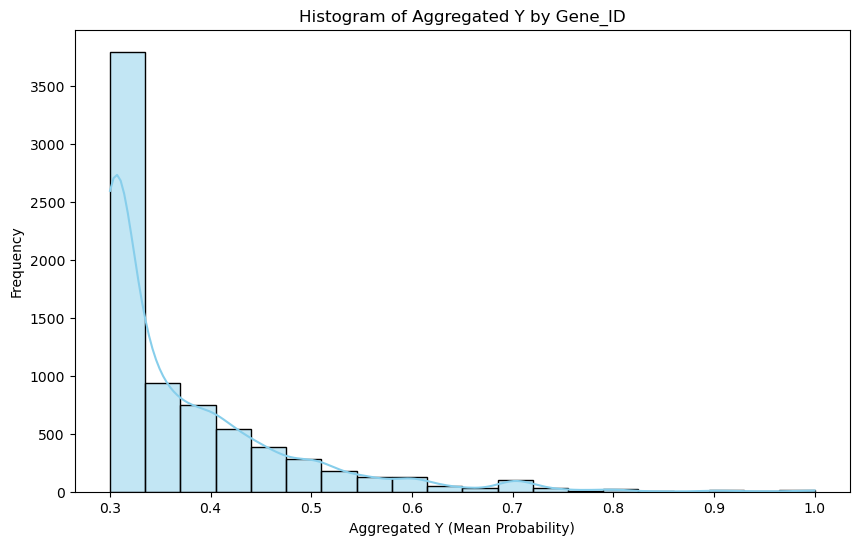

In [48]:
# Histogram of the association by Gene_ID and Y
# Aggregate the Y values by Gene_ID
gene_y_aggregated = full_data.groupby('Gene_ID')['Y'].mean()

# Plot a histogram to show the distribution of aggregated Y values
plt.figure(figsize=(10, 6))
sns.histplot(gene_y_aggregated, kde=True, bins=20, color="skyblue")
plt.title('Histogram of Aggregated Y by Gene_ID')
plt.xlabel('Aggregated Y (Mean Probability)')
plt.ylabel('Frequency')
plt.show()

In [49]:
# Histogram of the association by Disease_Label and Y
# Aggregate the Y values by Disease_Label
disease_y_aggregated = full_data.groupby('Disease_Label')['Y'].mean()

# Plot a histogram to show the distribution of aggregated Y values
plt.figure(figsize=(12, 8))
sns.histplot(disease_y_aggregated, kde=True, bins=20, color="lightgreen")
plt.title('Histogram of Aggregated Y by Disease_Label')
plt.xlabel('Aggregated Y (Mean Probability)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

KeyError: 'Disease_Label'

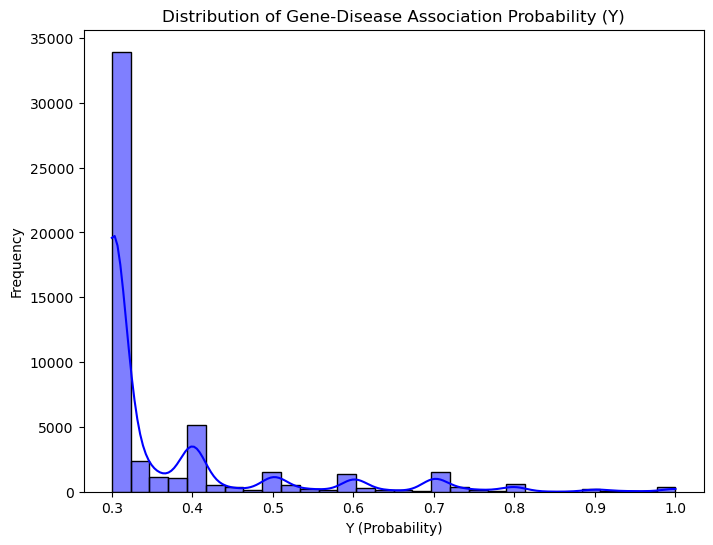

In [50]:
# Distribution plot for Y
plt.figure(figsize=(8, 6))
sns.histplot(full_data['Y'], kde=True, bins=30, color='blue')
plt.title("Distribution of Gene-Disease Association Probability (Y)")
plt.xlabel("Y (Probability)")
plt.ylabel("Frequency")
plt.show()

The target variable Y is moderately skewed towards lower probabilities, indicating that most gene-disease associations have low probability scores.

#### Gene and Disease Frequency Analysis

In [51]:
full_data['Disease_Label'] = full_data['Disease_Label'].str.split(':').str[0]

# Defining the 10 most frequent genes
top_genes = full_data['Gene_ID'].value_counts().head(10)

# Defining the 10 most frequent diseases
top_diseases = full_data['Disease_Label'].value_counts().head(10)


# Plotting top 10 genes and diseases
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top Genes
sns.barplot(x=top_genes.values, y=top_genes.index, ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Frequent Genes")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Gene_ID")

# Top Diseases
sns.barplot(x=top_diseases.values, y=top_diseases.index, ax=axes[1], palette="plasma")
axes[1].set_title("Top 10 Frequent Diseases")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Disease Label")

plt.tight_layout()
plt.show()

KeyError: 'Disease_Label'

#### Gene-Disease Pairing Analysis
To explore the relationships between genes and diseases, we analyze and visualize their pairwise occurrences.

In [52]:
# RETIRAR ESTES RESULTADOS
# Pairwise analysis
pair_counts = full_data.groupby(['Gene_ID', 'Disease_Label']).size().reset_index(name='Pair_Frequency')
pair_counts = pair_counts.sort_values(by='Pair_Frequency', ascending=False)

print("Top 5 Gene-Disease pairs:\n", pair_counts.head())

# Visualizing the pair frequency
plt.figure(figsize=(10, 8))
heatmap_data = pair_counts.pivot('Gene_ID', 'Disease_Label', 'Pair_Frequency').fillna(0)

sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, square=True)
plt.title("Heatmap of Gene-Disease Pair Frequencies")
plt.xlabel("Disease Label")
plt.ylabel("Gene_ID")
plt.show()


KeyError: 'Disease_Label'

Some gene-disease pairs occur multiple times, indicating strong research focus or known associations.
The heatmap reveals clusters of high-frequency pairs, which can guide hypothesis generation.

#### Correlation Analysis
Checking correlations between numerical columns to understand dependencies.

In [53]:
# Correlation matrix
corr_matrix = full_data[['Gene_ID', 'Disease_ID_encoded', 'Y']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


KeyError: "['Disease_ID_encoded'] not in index"

Weak correlations exist between Y and other features, indicating that predictions will require complex patterns rather than simple linear relationships.

#### Conclusions from Exploratory Data Analysis

1. **Variable Distribution**:  
   - Most gene sequences range from 200 to 500 amino acids in length.  
   - The target variable 'Y' is slightly skewed towards lower probabilities, indicating that most gene-disease associations have a low likelihood.

2. **Gene and Disease Frequency**:  
   - Some genes and diseases appear much more frequently in the dataset. For example, certain genes appear in over 200 gene-disease pairs.  
   - The most common diseases include breast cancer and schizophrenia.

3. **Correlation and Outliers**:  
   - Correlations between variables are weak, suggesting that predictions will need to account for complex patterns.  
   - Outliers were identified in the variable 'Y' and should be considered when developing the model.

4. **Gene-Disease Pair Analysis**:  
   - Some gene-disease pairs occur multiple times, indicating strong research focus or well-known associations.  
   - Heatmap analysis shows high-frequency clusters, which could help guide hypothesis generation.

## Unsupervised learning

### Dimensionality Reduction

Working with high-dimensional data can present a number of challenges, such as increased computational complexity, greater risk of overfitting and difficulty interpreting the results.
As such, dimensionality reduction is a fundamental technique in machine learning, especially in problems with high dimensionality, where the number of variables or features is very large. This approach seeks to simplify the data set, keeping as much relevant information as possible, while eliminating redundancies and noise.

#### Principal Components Analysis (PCA)

PCA is a dimensionality reduction technique that transforms a set of possibly correlated variables into a new set of uncorrelated variables called principal components. It does this by identifying directions in the data space that capture the greatest possible variance, ordering these directions by importance. In this way, PCA makes it possible to represent the data in a lower-dimensional space, preserving as much information as possible.

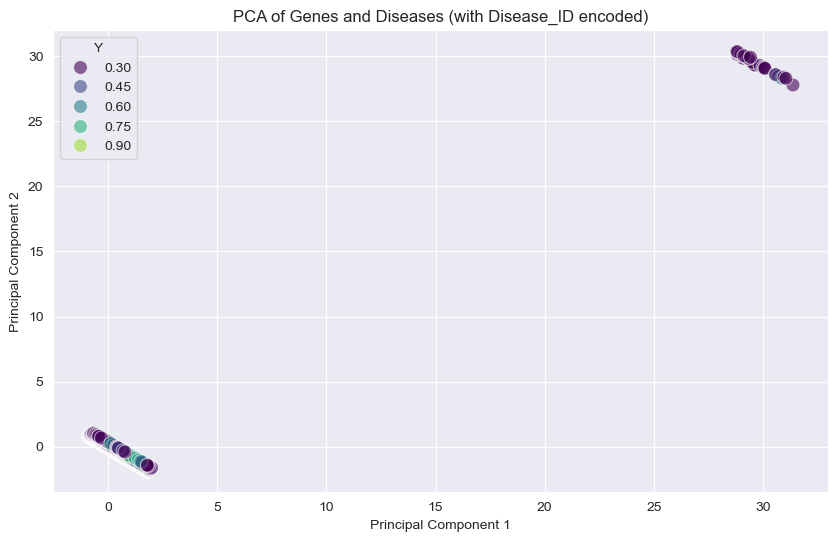

In [55]:
numerical_features = full_data[['Gene_ID', 'Disease_ID_encoded']] #For unsupervised 

# Normalizing numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Applying PCA to reduce dimensionality to 2 principal components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Adding principal components to original dataframe
full_data['PCA1'] = pca_features[:, 0]
full_data['PCA2'] = pca_features[:, 1]

# Visualizing reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Y', palette='viridis', data=full_data, s=100, alpha=0.6, edgecolor='w')
plt.title('PCA of Genes and Diseases (with Disease_ID encoded)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [56]:
#Variance explained by principal components
pca.fit(scaled_features)
explained_variance_percentage = pca.explained_variance_ratio_ * 100
print("Explained Variance:", [round(ev, 2) for ev in explained_variance_percentage])
cumulative_explained_variance_percentage = np.cumsum(explained_variance_percentage)
print("Cumulative explained variance:", round(cumulative_explained_variance_percentage[-1], 2))

Explained Variance: [50.2, 49.8]
Cumulative explained variance: 100.0


The first principal component captures 50.2% of the variability in the data, and the second principal component captures 49.8% of the variability in the data.

### Clustering

Clustering is an unsupervised learning technique that identifies patterns and structure in data, grouping them into homogeneous clusters. It uses distance or similarity measures to group together nearby data points, seeking to maximize intra-cluster cohesion and inter-cluster separation. These clusters can reveal insights into the underlying structure of the data.
In this project, two clustering algorithms were addressed: **hierarchical clustering**, which builds a tree of clusters, where each node represents a cluster; **K-means**, which is a clustering algorithm that divides a data set into K clusters by minimizing the sum of the squares of the distances between the points and the centroids.

The module used for this analysis was **sklearn.cluster**


#### Hierarchical Clustering

#### Clustering K-Means

K-means is an unsupervised clustering algorithm widely used to group data into distinct clusters. The goal of K-means is to divide a dataset into K clusters in such a way that the data within the same cluster are as homogeneous as possible, while the data in different clusters are as distinct as possible.

The operation of K-means is based on the idea that the data can be represented by centroids, or central points, and that the distance between the data and its corresponding centroid should be minimized. The algorithm achieves this through an iterative process that follows three main steps:

- Initialization: The algorithm starts with the random selection of K central points (centroids) that will serve as the initial centers of the clusters. In this case, the number of clusters K is determined using the **elbow - method**, which helps identify the optimal number of clusters by analyzing the point where the reduction in inertia (sum of squared distances) begins to slow down.

- Assignment: Each data point is assigned to the nearest center, meaning each point is assigned to the cluster whose centroid is closest, based on a distance metric such as Euclidean distance.

- Update: After assigning the points to the clusters, the algorithm recalculates the position of the centroids as the average of the points belonging to each cluster.

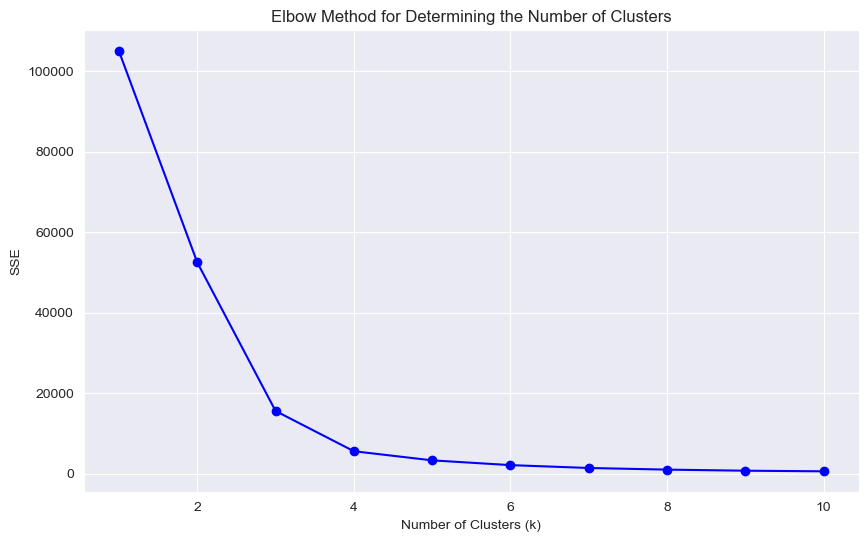

In [57]:
# Choose the number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.show()


By observing the graph, it was determined that the point on the graph resembling an "elbow" occurs at K=3. From the point K=3 onwards, adding more clusters does not result in a significant reduction of the WSS (Within-Cluster Sum of Squares).



In [58]:
optimal_k = 3

# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
full_data['Cluster'] = clusters

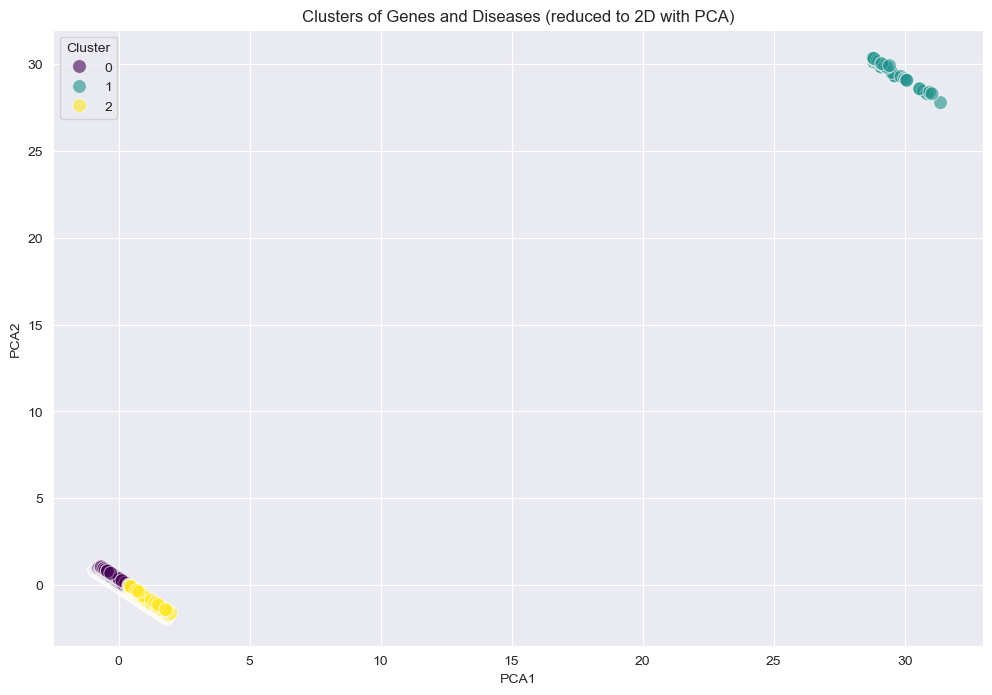

In [59]:
#Plot K-means clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=full_data, s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters of Genes and Diseases (reduced to 2D with PCA)')
plt.show()

## Bibliografia

[1] Opap, K., & Mulder, N. (2017). Recent advances in predicting gene–disease associations. F1000Research, 6, 578. https://doi.org/10.12688/f1000research.10788.1
    
[2] Therapeutics Data Commons. (2024). TDC. https://tdcommons.ai/

[3] Piñero, J., Ramírez-Anguita, J. M., Saüch-Pitarch, J., Ronzano, F., Centeno, E., Sanz, F., & Furlong, L. I. (2019). The DisGeNET knowledge platform for disease genomics: 2019 update. Nucleic Acids Research, 48(D1). https://doi.org/10.1093/nar/gkz1021